### Machine Learning Model: Predict the monetary (GDP) value of all finished goods and services made by China

Fonte dos dados: https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/edX/ML0101EN/ML0101EN-Reg-NoneLinearRegression-py-v1.ipynb?lti=true

In [353]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy
import sklearn.metrics as metrics
import seaborn as sns

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv'
    
df = pd.read_csv(path)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


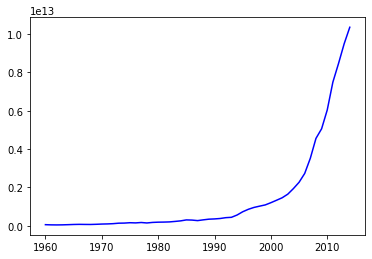

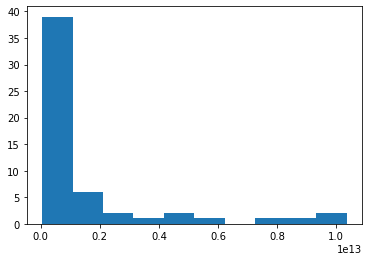

C:\Users\010823631\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


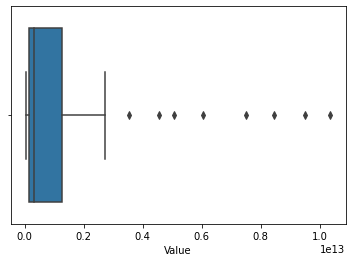

In [13]:
plt.plot(df['Year'],df['Value'], color='b')
plt.show()
plt.hist(df['Value'])
plt.show()
sns.boxplot(df['Value'])
plt.show()

In [317]:
#definir coluna preditora e coluna target
x = df['Year'].values
y = df['Value'].values

In [318]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #split do dado para melhor avaliacao

In [340]:
#normalizar dados
x_train = x_train/x_train.max()
y_train = y_train/y_train.max()

x_test = x_test/x_test.max()
y_test = y_test/y_test.max()

In [326]:
#modelo sigmoidal/logistico
def lr(x_data,b1,b2): #recebe as variaveis preditoras e os parametros da funcao logistica
    y = 1/ (1+np.exp(-b1*(x_data-b2)))
    return y

In [341]:
#encontrar os parametros do modelo (b1 e b2)
param = scipy.optimize.curve_fit(lr,x_train,y_train)
param

(array([762.58833675,   0.99717582]),
 array([[ 3.23958689e+03, -6.58092880e-04],
        [-6.58092880e-04,  1.14713415e-08]]))

In [342]:
y_preds = lr(x_test,param[0][0],param[0][1]) #fazer predicao com outro o sample teste

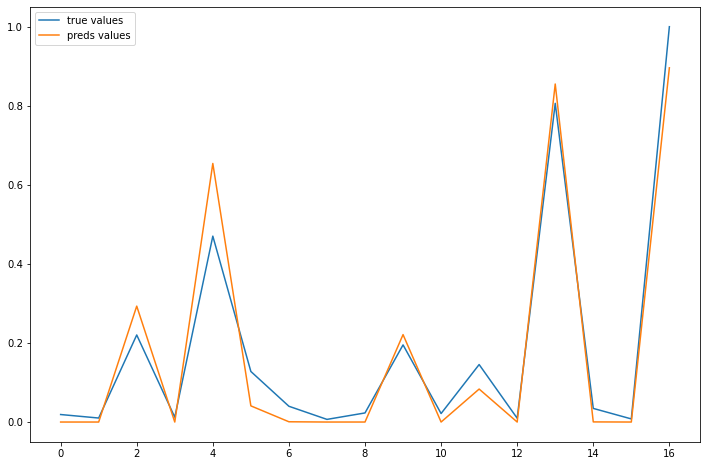

In [347]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label = 'true values')
plt.plot(y_preds, label = 'preds values')
plt.legend()

In [349]:
#metricas para validacao do modelo sigmoidal
print('MSE: ',metrics.mean_squared_error(y_test,y_preds))
print('R2_score:',metrics.r2_score(y_test,y_preds) )

MSE:  0.004053726590722258
R2_score: 0.951336952435723


A acuracia do modelo foi muito boa, porem tem que levar em conta que foram dados teste in-sample. Para saber se o modelo e adaptavel/robusto, seria interessante testar com outro dataset.

Antes de escolher usar a funcao logistica, foi feita uma tentativa com uma curva exponencial. Porem, o dado nao se ajustou a esse modelo, ultrapassando o maximo de iteracoes permitidas

Em andamento ...